# Analysing historical records of wave data from IMOS

Access to historical records is important to 
* evaluate global and local impacts of climate change & anthropogenic influences and 
* test and validate models. In the modelling area, this kind of approach is done  routinely to evaluate models performances (hindcast models).

Here we will see how we can query historical data from a buoy located offshore Sydney. 

Our dataset is available from: 

<a href='http://imos.org.au'>IMOS Data Portal</a> and has been recorded by the <a href='http://new.mhl.nsw.gov.au/TodaysConditions-Sydney'>**Manly Hydraulics Laboratory**</a>:
+ <a href='http://imos-data.s3-website-ap-southeast-2.amazonaws.com/?prefix=NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/'>dataset link</a>

We will use the **netCDF** libary (<a ref='http://www.unidata.ucar.edu/netcdf/'>Network Common Data Form</a>) is a set of software libraries and self-describing, machine-independent data formats that support the creation, access, and sharing of array-oriented scientific data. The project homepage is hosted by the **Unidata** program at the University Corporation for Atmospheric Research (**UCAR**).

Loading a module is straight forward:

In [6]:
%matplotlib inline
from pylab import *
import netCDF4
import datetime as dt
import numpy as np
import pandas as pd

from pylab import rcParams
import warnings
warnings.filterwarnings('ignore')

# 2015 Waverider Buoy dataset

We will use a dataset containing ocean wave data from wave monitoring buoy moored off Sydney at latitude 33$^o$46'26" S, longitude 151$^o$24'42" E and water depth 90 metres.  

<a href='https://s3-ap-southeast-2.amazonaws.com/imos-data/NSW-OEH/Manly_Hydraulics_Laboratory/Wave/Sydney/Sydney_Waverider_Buoy_location_history.pdf'> Sydney Waverider Buoy location history</a>



The data is gathered using the Directional Waverider system developed by the Dutch company, Datawell. The Directional Waverider buoy utilises a heave-pitch-roll sensor, two fixed X and Y accelerometers and a three axis fluxgate compass to measure both vertical and horizontal motion.  An on-board processor converts the buoy motion to three orthogonal (vertical, north-south, east-west) translation signals that are transmitted to the shore station.  The directional spectrum is also routinely transmitted to the receiving station for further processing.  The wave data is stored on the receiving station PC before routine transfer to Manly Hydraulics Laboratory.

In [7]:
# Offshore Sydney buoy data
filename = '../../dataset/IMOS_ANMN-NSW_W_20150210T230000Z_WAVESYD_WAVERIDER_FV01_END-20171231T130000Z.nc'
# Offshore Batemans Bay buoy data
#filename = '../../dataset/IMOS_ANMN-NSW_W_20080124T210000Z_WAVEBAB_WAVERIDER_FV01_END-20151231T130000Z.nc'

nc_data=netCDF4.Dataset(filename)

## Query dataset

Let have a look at the loaded netCDF variables

In [8]:
nc_data.variables.keys()

dict_keys(['TIME', 'TIMESERIES', 'LATITUDE', 'LONGITUDE', 'WHTH', 'WMSH', 'HRMS', 'WHTE', 'WMXH', 'TCREST', 'WPMH', 'WPTH', 'YRMS', 'WPPE', 'TP2', 'M0', 'WPDI'])

In [9]:
print(nc_data.variables['TIME'])

<class 'netCDF4._netCDF4.Variable'>
float64 TIME(TIME)
    long_name: time
    standard_name: time
    units: days since 1950-01-01 00:00:00 UTC
    calendar: gregorian
    valid_max: 999999.0
    axis: T
    valid_min: 0.0
unlimited dimensions: 
current shape = (23382,)
filling on, default _FillValue of 9.969209968386869e+36 used


## Find out time interval record

Get the time extension of the gathered data...

In [10]:
units = nc_data.variables['TIME'].units
calendar = nc_data.variables['TIME'].calendar

times = netCDF4.num2date(nc_data.variables['TIME'][:], units=units, calendar=calendar)

In [18]:
start = dt.datetime(2015,1,1)
# Get desired time step  
time_var = nc_data.variables['TIME']
itime = netCDF4.date2index(start,time_var,select='nearest')
dtime = netCDF4.num2date(time_var[itime],time_var.units)
daystr = dtime.strftime('%Y-%b-%d %H:%M')

print('buoy record start time:',daystr)

buoy record start time: 2015-Feb-10 23:00


In [19]:
end = dt.datetime(2015,12,31)
# Get desired time step  
time_var = nc_data.variables['TIME']
itime2 = netCDF4.date2index(end,time_var,select='nearest')
dtime2 = netCDF4.num2date(time_var[itime2],time_var.units)
dayend = dtime2.strftime('%Y-%b-%d %H:%M')

print('buoy record end time:',dayend)

buoy record end time: 2015-Dec-31 00:00


In [20]:
print('Records per day:')
for k in range(1,25):
    print(netCDF4.num2date(time_var[k],time_var.units))

Records per day:
2015-02-11 00:00:00
2015-02-11 01:00:00
2015-02-11 02:00:00
2015-02-11 03:00:00
2015-02-11 04:00:00
2015-02-11 05:00:00
2015-02-11 06:00:00
2015-02-11 07:00:00
2015-02-11 08:00:00
2015-02-11 09:00:00
2015-02-11 10:00:00
2015-02-11 11:00:00
2015-02-11 12:00:00
2015-02-11 13:00:00
2015-02-11 14:00:00
2015-02-11 15:00:00
2015-02-11 16:00:00
2015-02-11 17:00:00
2015-02-11 18:00:00
2015-02-11 19:00:00
2015-02-11 20:00:00
2015-02-11 21:00:00
2015-02-11 22:00:00
2015-02-11 23:00:00


In [21]:
TCREST = nc_data.variables['TCREST']
TCREST[itime:itime2]
print(TCREST[itime:itime2])
print(min(TCREST[itime:itime2]),max(TCREST[itime:itime2]))
print(TCREST[itime:itime2].shape)

HRMS = nc_data.variables['HRMS']
HRMS[itime:itime2]
print(HRMS[itime:itime2])
print(min(HRMS[itime:itime2]),max(HRMS[itime:itime2]))


[3.77 3.84 3.92 ... 4.77 4.82 4.84]
2.68 7.53
(7286,)
[0.808 0.849 0.801 ... 1.116 1.074 1.127]
0.356 5.582


## Buoy location

Check the location of the data

In [22]:
loni = nc_data.variables['LONGITUDE'][:]
lati = nc_data.variables['LATITUDE'][:]
print(loni,lati)
names=[]
names.append('Offshore Sydney Buoy')

151.41167 -33.77389


## Visualise buoy records

Export for the historical time serie, the desired buoy variables, here we use HRMS:

In [23]:
times = nc_data.variables['TIME']
jd_data = netCDF4.num2date(times[:],times.units, only_use_cftime_datetimes=False, 
                           only_use_python_datetimes=True).flatten()
hm_data = nc_data.variables['HRMS'][:].flatten()
T_data = nc_data.variables ['TCREST'][:].flatten()

In [24]:
jd_data

masked_array(data=[real_datetime(2015, 2, 10, 23, 0),
                   real_datetime(2015, 2, 11, 0, 0),
                   real_datetime(2015, 2, 11, 1, 0), ...,
                   real_datetime(2017, 12, 31, 11, 0),
                   real_datetime(2017, 12, 31, 12, 0),
                   real_datetime(2017, 12, 31, 13, 0)],
             mask=False,
       fill_value='?',
            dtype=object)

Now plot the exported dataset

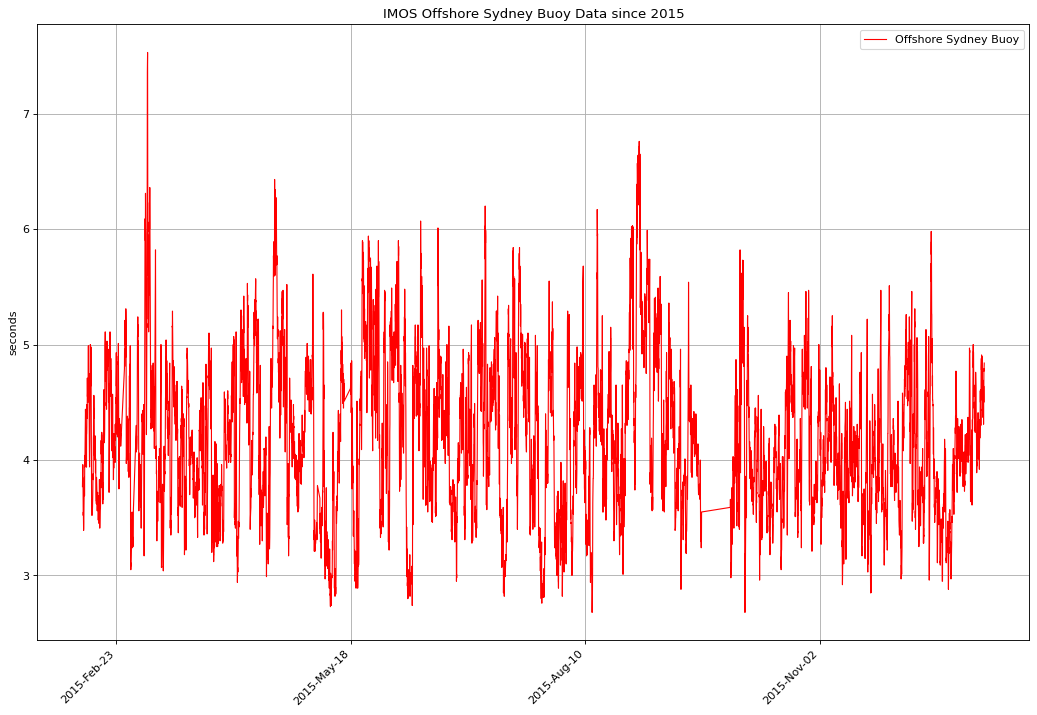

In [25]:
MyDateFormatter = DateFormatter('%Y-%b-%d')
fig = plt.figure(figsize=(16,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(jd_data[itime:itime2],T_data[itime:itime2],linewidth=1,c='red') 
ax1.xaxis.set_major_locator(WeekdayLocator(byweekday=MO,interval=12))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('IMOS Offshore Sydney Buoy Data since 2015')
ax1.set_ylabel('seconds')
ax1.legend(names,loc='upper right')

# April 2015 storm

![alt text](https://i.guim.co.uk/img/media/643dfa81d4bbca129906d8a26c683e3e6901c053/0_110_3000_1801/3000.jpg?w=1010&q=55&auto=format&usm=12&fit=max&s=6dac931858af8c21404a5604900ae71d)

_A man fools around in the wind at Bondi Beach, Sydney, on April 21 2015._

To find the temporal `id` of the storm we use the python function `argmax`:

In [53]:
idmax = hm_data[itime:itime2].argmax()
print('Temporal ID of the strom:',idmax)
print('Corresponding date:',jd_data[idmax])

Temporal ID of the strom: 1595
Corresponding date: 2015-04-21 06:00:00


## Plotting variables 

Set the wave height RMS 48h before and after the recorded maximum wave height RMS time.

In [54]:
storm_time = jd_data [idmax-48:idmax+48]
storm_hrms = hm_data [idmax-48:idmax+48]
storm_period = T_data [idmax-48:idmax+48]

In [55]:
HRMS1 = nc_data.variables['HRMS']
HRMS1[idmax-48:idmax+48]
print(HRMS1[idmax-48:idmax+48])
print(min(HRMS1[idmax-48:idmax+48]),max(HRMS1[idmax-48:idmax+48]))

[0.693 0.912 1.202 1.324 1.365 1.718 1.843 2.201 2.359 2.34  2.406 2.45
 2.44  2.194 2.107 2.169 2.126 2.313 2.378 2.387 2.496 2.485 2.411 2.31
 2.509 2.838 2.841 3.198 3.364 3.538 4.07  4.157 4.573 4.349 4.689 4.326
 4.566 4.769 5.197 5.299 5.159 4.952 4.445 4.899 5.333 5.116 5.359 5.292
 5.582 5.39  5.457 5.19  4.839 4.596 4.52  4.768 4.21  4.05  3.565 3.72
 3.617 3.308 3.13  3.029 2.69  2.783 2.721 2.768 2.993 2.788 2.627 2.705
 2.63  2.335 2.256 2.066 1.891 1.801 1.783 1.763 1.674 1.566 1.698 1.72
 1.822 1.741 1.6   1.705 1.431 1.436 1.616 1.511 1.559 1.32  1.377 1.296]
0.693 5.582


In [56]:
TCREST1 = nc_data.variables['TCREST']
TCREST1[idmax-48:idmax+48]
print(TCREST1[idmax-48:idmax+48])
print(min(TCREST1[idmax-48:idmax+48]),max(TCREST1[idmax-48:idmax+48]))

[3.33 3.44 3.82 3.84 3.89 4.26 4.38 4.73 4.66 4.78 4.78 4.88 4.72 4.68
 4.54 4.58 4.45 4.61 4.67 4.63 4.77 4.64 4.69 4.73 4.81 4.83 5.07 5.16
 5.14 5.35 5.46 5.56 5.77 5.72 5.89 5.59 5.82 5.81 6.43 6.07 6.09 6.11
 5.6  5.85 6.34 5.97 6.25 6.05 6.27 5.95 6.18 6.27 5.91 5.82 5.69 5.77
 5.56 5.35 5.29 5.22 5.05 5.19 5.24 5.07 5.13 5.01 4.99 4.84 4.88 4.76
 4.77 4.86 4.63 4.6  4.5  4.73 4.93 4.82 4.91 4.87 4.62 4.19 4.27 4.53
 5.12 4.84 4.57 4.65 4.39 4.98 5.03 4.6  4.84 4.65 5.01 5.08]
3.33 6.43


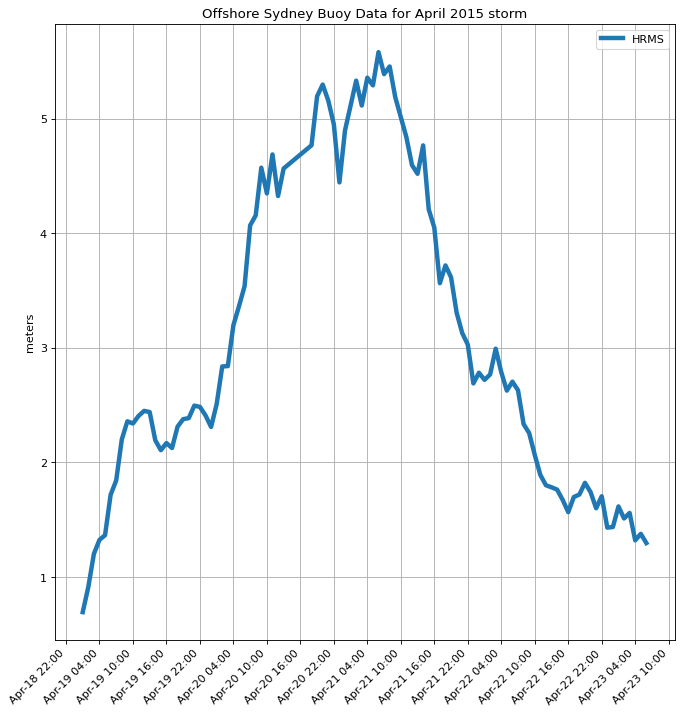

In [57]:
MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_hrms,linewidth=4) 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
ax1.set_ylabel('meters')
names = ['HRMS']
ax1.legend(names,loc='upper right')

## Wave power and energy

- Wave power:
$$P = \frac{\rho g^2}{64 \pi} H_{mo}^2 T \simeq 0.5 H_{mo}^2 T$$

- Wave energy:
$$E = \frac{1}{16}\rho g H_{mo}^2$$

_Note:_
You can define $\pi$ using np.pi.

### Define the functions

In [21]:
def wave_power(rho,g,h,t):
    power = ((rho*(g**2))/(64*np.pi))*(h**2)*t
    return power

def wave_energy(rho,g,h):
    energy = 1/16*rho*g*(h**2)
    return energy

In [43]:
WHTH = nc_data.variables['WHTH']
WHTH[:]

WPTH = nc_data.variables['WPTH']
WPTH[:]

storm_power = wave_power(rho=997,g=9.8,t = np.asarray(WPTH[idmax-24:idmax+24]),h = np.asarray(WHTH[idmax-24:idmax+24]))
print(storm_power)
storm_energy = wave_energy(rho=997,g=9.8,h = np.asarray(WHTH[idmax-24:idmax+24]))
print(storm_energy)

[ 53373.453  68086.79   67611.97   87184.38   99178.23  111303.81
 158703.28  164397.16  204764.27  185707.05  216423.16  181187.66
 203379.97  239217.31  277772.56  290194.8   263711.62  246163.7
 199572.77  240524.95  293661.4   271054.66  313417.9   300292.56
 362319.6   317400.03  339363.22  316527.75  250450.58  219247.27
 214293.56  235310.47  193044.31  175594.86  126953.64  138955.77
 130019.32  111519.28   98303.52   89081.94   73372.44   76633.484
  75400.625  79061.11   86749.36   70380.96   62882.215  62490.066]
[ 7839.6167  9809.721   9741.31   12125.273  13616.115  15199.462
 20514.361  21444.926  25491.812  23884.547  27314.533  23187.004
 25294.918  27560.127  33133.297  33675.273  31691.928  30119.416
 23983.947  28478.393  34514.84   32301.924  34735.555  34166.812
 39641.31   34579.145  36971.926  34929.266  28220.424  25768.744
 25279.201  26988.777  22042.51   20450.703  15758.999  16953.432
 16108.359  13644.967  12382.407  11422.822   9178.947   9412.432
  9216.8

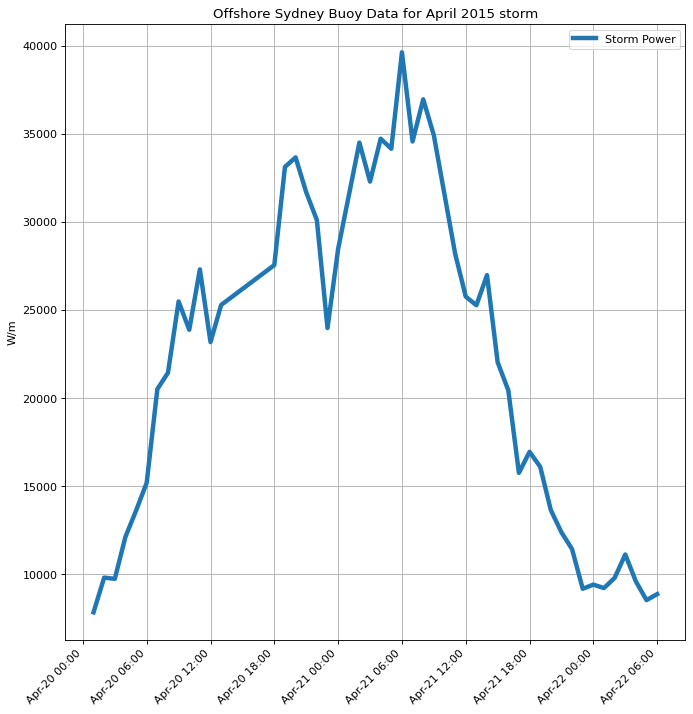

In [44]:
storm_time = jd_data [idmax-24:idmax+24]

MyDateFormatter = DateFormatter('%b-%d %H:%M')
fig = plt.figure(figsize=(10,10), dpi=80) 
ax1 = fig.add_subplot(111)

ax1.plot(storm_time,storm_energy,linewidth=4) 
ax1.xaxis.set_major_locator(HourLocator(byhour=range(24),interval=6))
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Offshore Sydney Buoy Data for April 2015 storm')
ax1.set_ylabel('W/m')
names = ['Storm Power']
ax1.legend(names,loc='upper right')

In [24]:
# Batemans Bay data

In [36]:
import requests
filename1 = 'https://thredds.aodn.org.au/thredds/dodsC/Department_of_Planning_and_Environment-New_South_Wales/Manly_Hydraulics_Laboratory/WAVE-BUOYS/DELAYED/WAVE-PARAMETERS/BATEMANS-BAY/MHL_20080124_BATEMANS-BAY_DM_WAVE-PARAMETERS_END-20151231.nc'
nc_data1=netCDF4.Dataset(filename1)
nc_data1.variables.keys()

dict_keys(['TIME', 'timeSeries', 'LATITUDE', 'LONGITUDE', 'WHTH', 'WMXH', 'WPMH', 'WPTH', 'WPPE', 'TP2', 'WPDI', 'WAVE_quality_control'])

### Plot the data over the storm duration

In [32]:
dates = pd.to_datetime(data_df['TIME'], format = '%Y-%m-%dT%H:%M:%SZ')

TypeError: arg must be a string, datetime, list, tuple, 1-d array, or Series

In [27]:
data_df['WHTH']

<class 'netCDF4._netCDF4.Variable'>
float32 WHTH(TIME)
    _FillValue: 99999.0
    comment: Analysed by zero crossing method
    valid_min: 0.0
    coordinates: TIME LATITUDE LONGITUDE
    standard_name: sea_surface_wave_significant_height
    units: m
    valid_max: 100.0
    long_name: sea_surface_wave_significant_height_of_largest_third
unlimited dimensions: 
current shape = (23382,)
filling on

NameError: name 'dates' is not defined

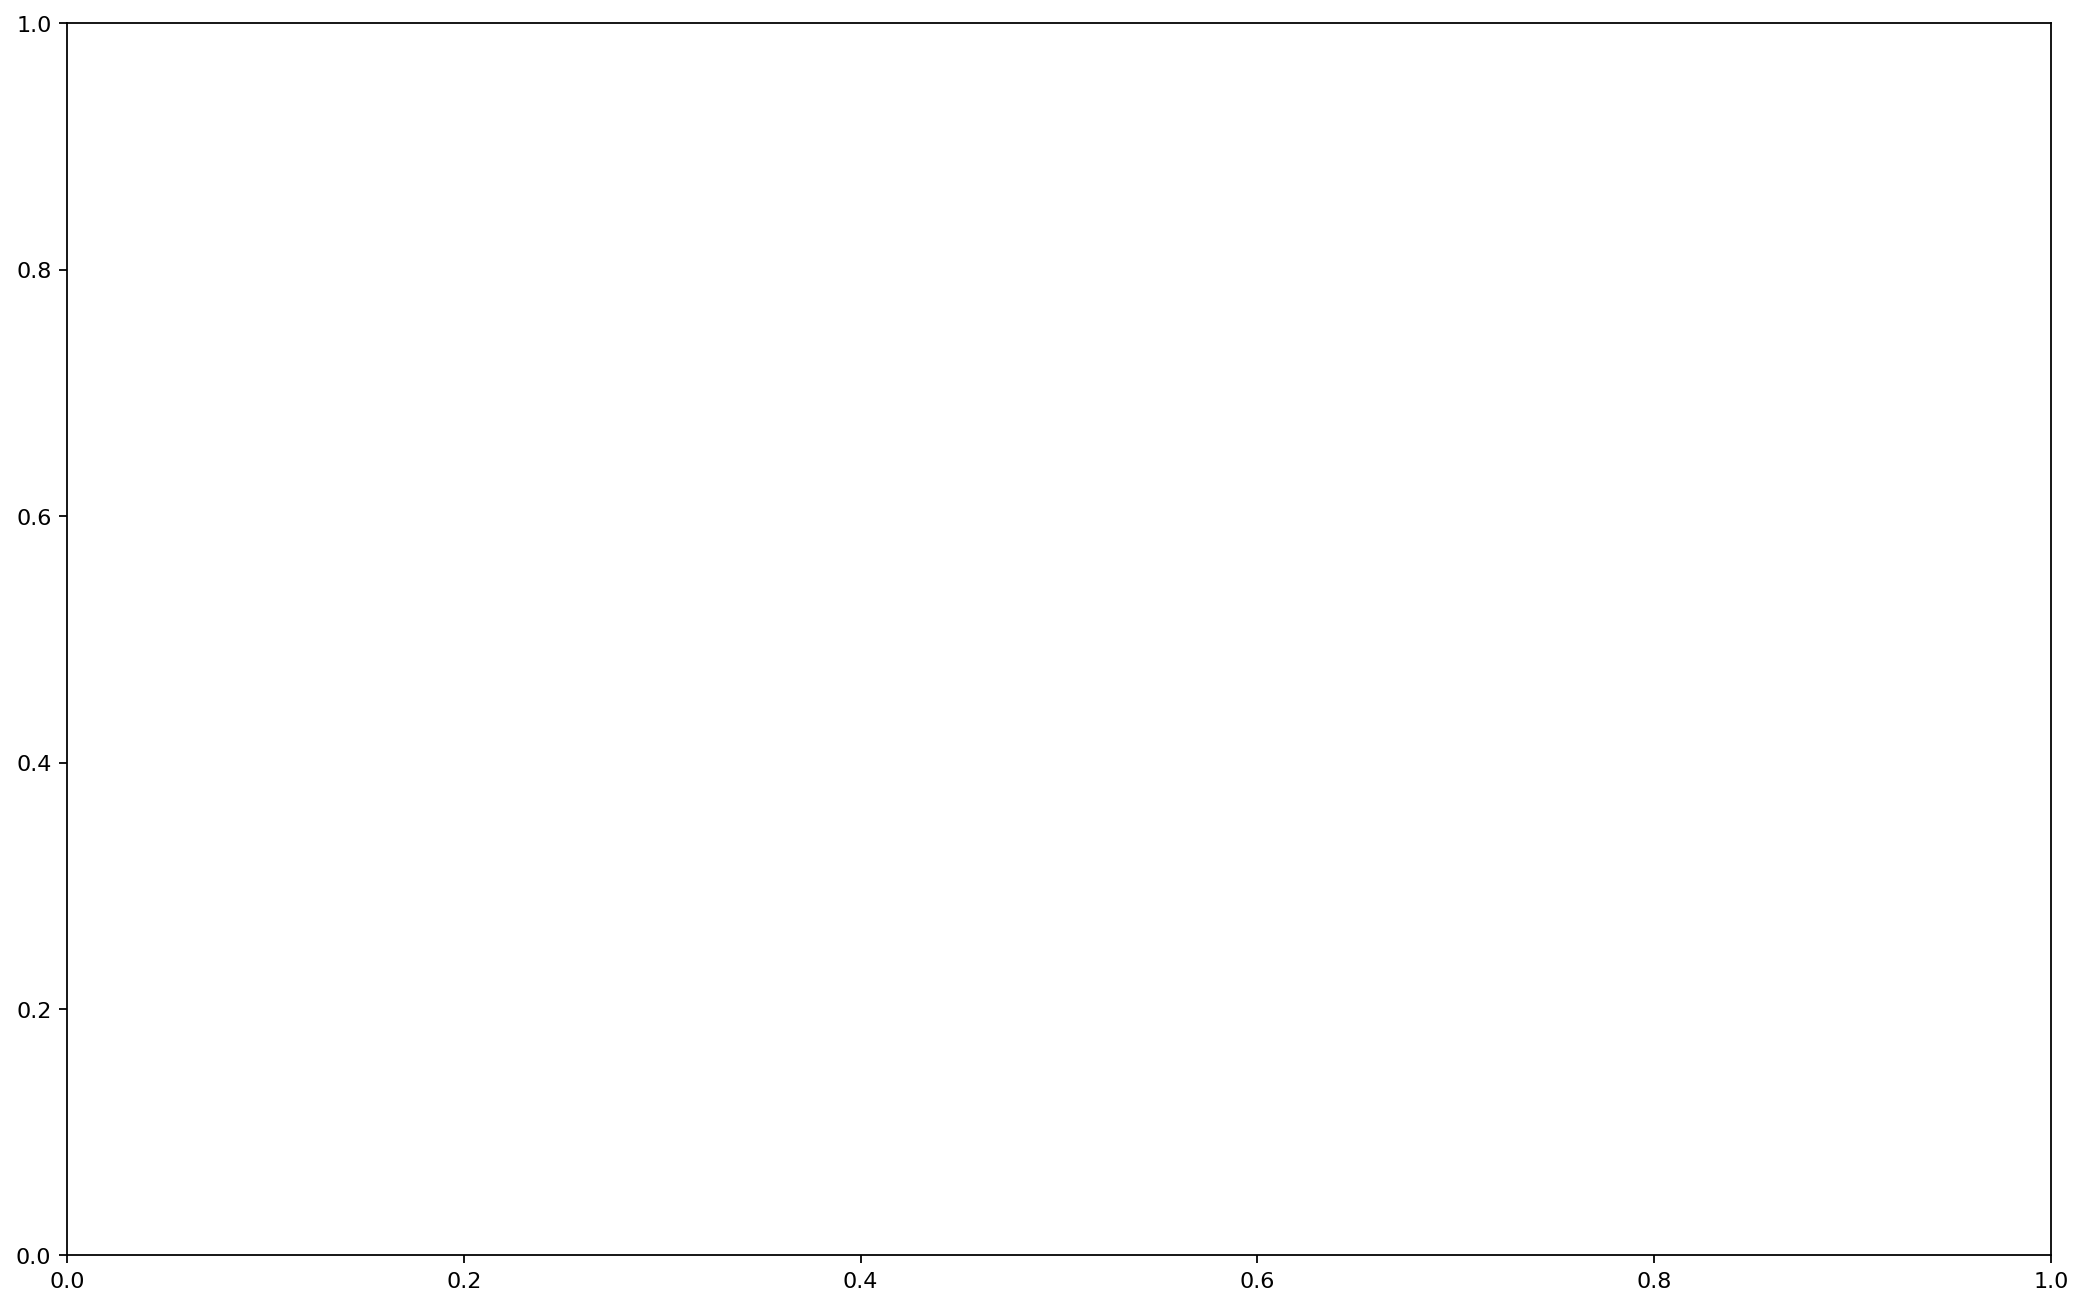

In [28]:
import matplotlib.dates as mdates
MyDateFormatter = DateFormatter('%Y-%b-%d')
fig = plt.figure(figsize=(16,10), dpi=160) 
ax1 = fig.add_subplot(111)
ax1.plot(dates,data_df['WHTH'],linewidth=3) 
locator = mdates.AutoDateLocator()
ax1.xaxis.set_major_locator(locator)
ax1.xaxis.set_major_formatter(MyDateFormatter)
ax1.grid(True)
setp(gca().get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('IMOS Offshore Sydney Buoy Data since 2015')
ax1.set_ylabel('meters')

fig.show()